<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/Task/pandas_%EC%8B%A4%EC%8A%B5_mycar_0531_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 실습 과제
mtcars.csv 데이터 셋에서 mpg 예측모델을 생성하기 위해 필요한 전처리 및 탐색적 분석을 수행한 결과로 데이터셋을 도출한 후 주어진 모델링 및 평가코드를 적용하여 결과를 출력하세요.

[데이터 셋 변수 설명]

- mpg: 연비(miles per gallon)
- cyl: 실린더 개수(number of cylinders)
- disp: 배기량(displacement)
- hp: 마력(horsepower)
- drat: 후륜비(rear axle ratio)
- wt: 차량 무게(weight)
- qsec: 1/4 마일 달성 시간(1/4 mile time)
- vs: 엔진 형태(V/S)
- am: 변속기 종류(automatic or manual)
- gear: 기어 수(number of gears)
- carb: 기화기 개수(number of carburetors)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
# 데이터 불러오기
file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/m_3_datas/mtcars.csv'
# file_path = 'mtcars.csv'
df = pd.read_csv(file_path, index_col=0)
# df = df.set_index('Unnamed: 0')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 대략적인 순서
# 1. 데이터 불러오기
# 2. info() 확인 -> null값, 데이터타입, 컬럼, describe 통계 요약표 확인 등등...
# 변수 선택(3, 4)
# 3. 중요한 변수 탐색 ex) 상관관계(종속변수<->독립변수), 변수분포 등...
# 4. 파생변수 -> 탐색적 분석 시도 -> 파생변수와 종속변수간의 상관관계 확인.
# 5. 표준화, 정규화 -> 적용할 분석용 데이터 셋 준비

In [ ]:
# 데이터 구조 확인
print(df.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [ ]:
# 데이터 확인
# 정보를 보면 null값이 보이지 않는다.
# 데이터 타입이 int와 float의 밖에 없다.
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.7859

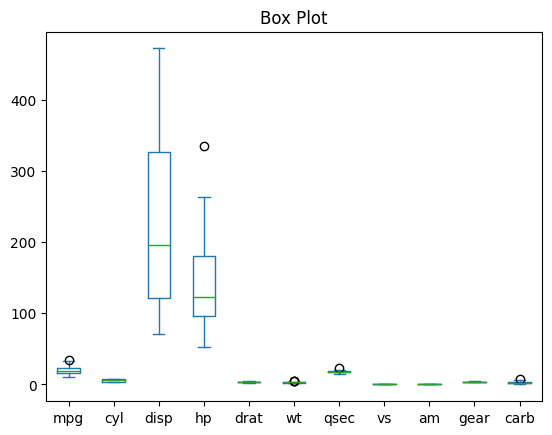

In [ ]:
# 박스 테이블 만들기
df.plot.box()
# df.boxplot(columns='mpg')
plt.title("Box Plot")
plt.show()

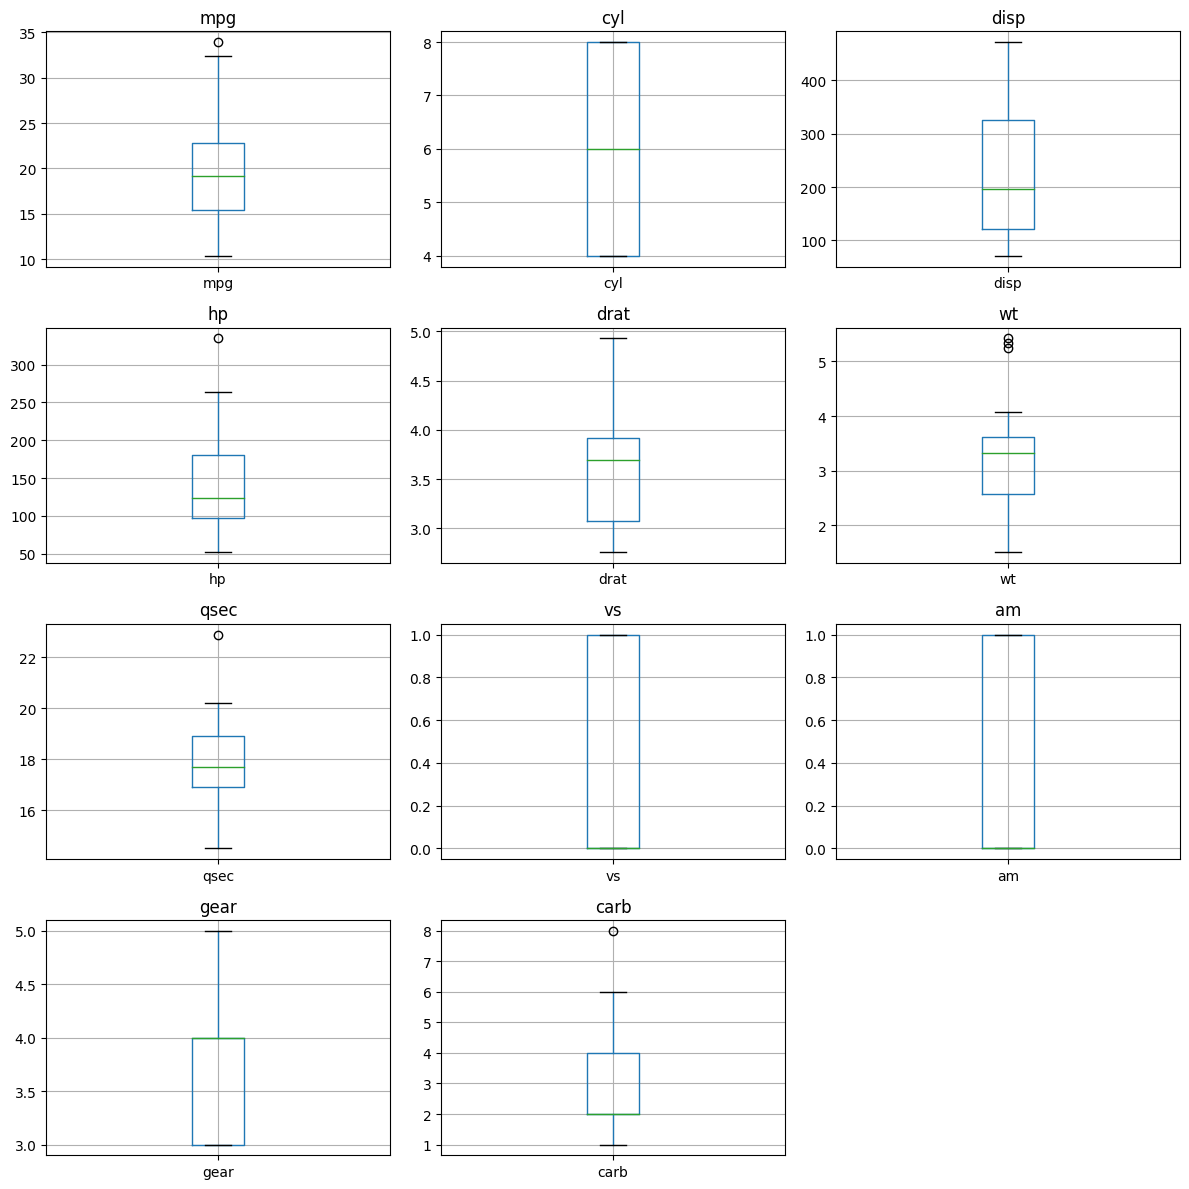

In [ ]:
# 박스테이블에 값차이가 커서 각각의 테이블을 만들어줘야됨
num_columns = len(df.columns)

# 그래프 크기 설정
plt.figure(figsize=(12,12))

#각 열에 대한 박스 플롯을 그립니다.
for i, column in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    df.boxplot(column=column)
    plt.title(column)

# 레이아웃을 조정함. tight_layout은 자동으로 조정
plt.tight_layout()
plt.show()

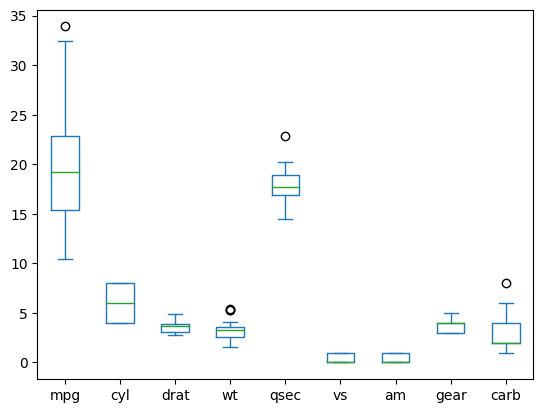

In [ ]:
# filtered = ['mpg','cyl','drat','wt','qsec','vs','am','gear','carb']
# filtered_df = df[filtered]
filtered_df = df[['mpg','cyl','drat','wt','qsec','vs','am','gear','carb']]
filtered_df.plot.box()
plt.show()

In [ ]:
# 피벗 테이블 생성
pivot_table = df.pivot_table(values='hp', index='cyl',columns='gear',aggfunc='mean',fill_value=0)
print(pivot_table)

gear           3      4      5
cyl                           
4      97.000000   76.0  102.0
6     107.500000  116.5  175.0
8     194.166667    0.0  299.5


In [ ]:
# 상관계수 행렬 계산
correlation_matrix = df.corr()
# print(correlation_matrix)
target_variable = 'mpg'
correlation_matrix[[target_variable]]     # 대괄호 한개 빠지면 시리즈로 나옴

,mpg
mpg,1.000000
cyl,-0.852162
disp,-0.847551
hp,-0.776168
drat,0.681172
wt,-0.867659
qsec,0.418684
vs,0.664039
am,0.599832
gear,0.480285


In [ ]:
# 타겟 변수와 상관관계가 높은 변수 선택(절대값 기준으로 상위 n개 선택)
target_variable = 'mpg'
correlation_threshold = 0.5
correlated_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable])>
                                    correlation_threshold].index.tolist()

# 선택된 변수 출력
print(f"Variables highly correlated with{target_variable}: {correlated_features}")

Variables highly correlated withmpg: ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']


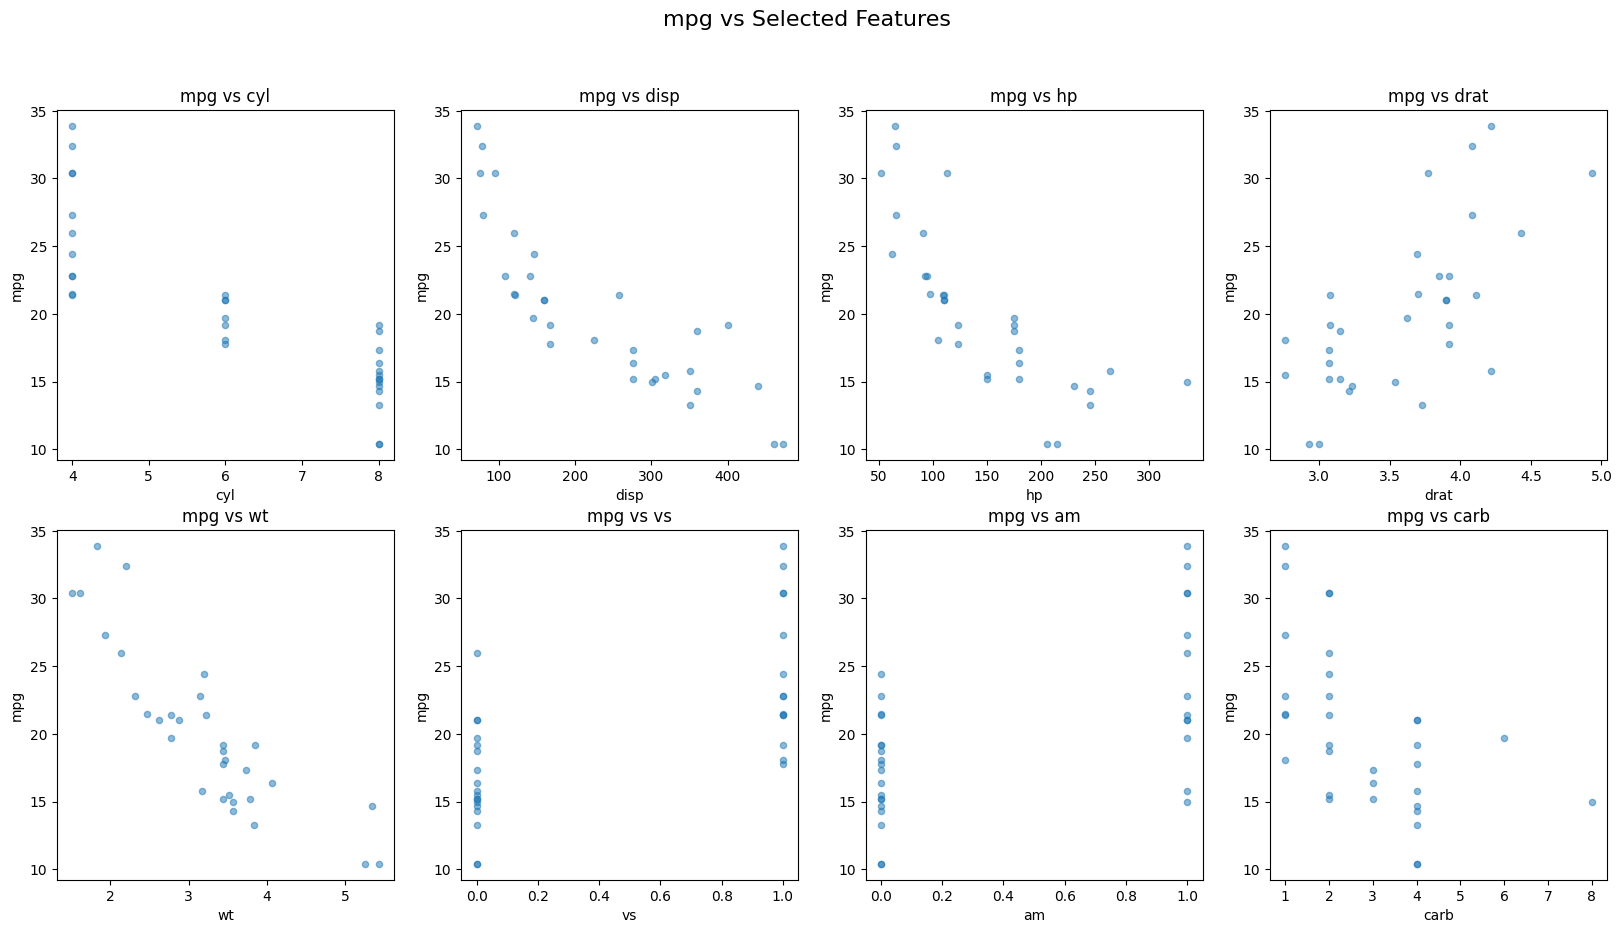

In [ ]:
# 분석할 칼럼들
columns = ['cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']
target = 'mpg'

# 2행 4열의 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# 각 subplot에 산점도 그리기
for i, col in enumerate(columns):
    row, col_idx = divmod(i,4)
    df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')

# 전체 제목 설정
fig.suptitle(f'{target} vs Selected Features', fontsize=16)
plt.show()

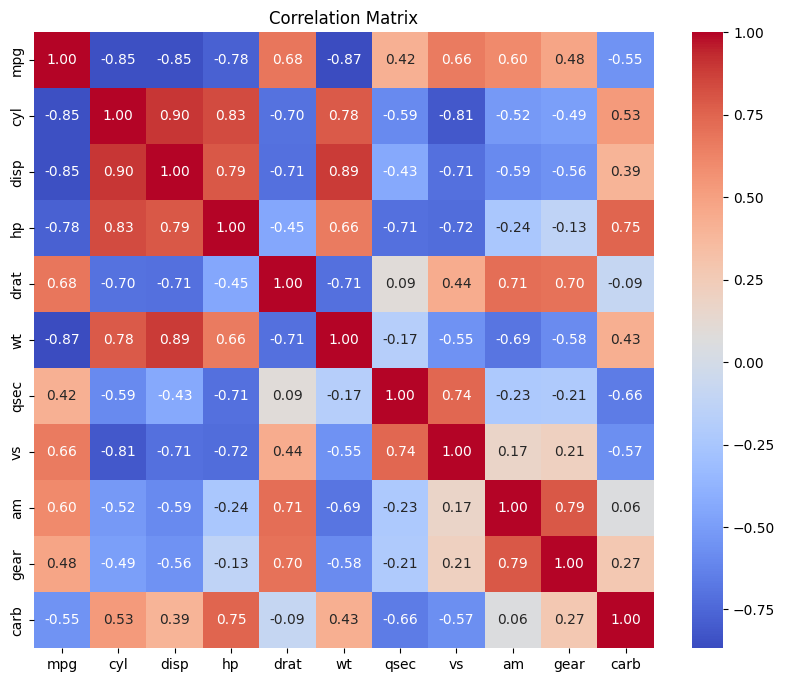

In [ ]:
# 상관계수 행렬 시각화
correlation_matrix = df.corr()

# Heatmap으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
correlated_features = [ 'mpg','disp', 'hp', 'drat', 'wt']
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'
# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

                    mpg   disp   hp  drat     wt
Mazda RX4          21.0  160.0  110  3.90  2.620
Mazda RX4 Wag      21.0  160.0  110  3.90  2.875
Datsun 710         22.8  108.0   93  3.85  2.320
Hornet 4 Drive     21.4  258.0  110  3.08  3.215
Hornet Sportabout  18.7  360.0  175  3.15  3.440
       disp        hp      drat        wt   mpg
0 -0.579750 -0.543655  0.576594 -0.620167  21.0
1 -0.579750 -0.543655  0.576594 -0.355382  21.0
2 -1.006026 -0.795570  0.481584 -0.931678  22.8
3  0.223615 -0.543655 -0.981576 -0.002336  21.4
4  1.059772  0.419550 -0.848562  0.231297  18.7


In [ ]:
# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 8.99
Root Mean Squared Error: 3.0
R-squared: 0.78
